$\newcommand{\bmx}{\large \boldsymbol{x} \normalsize}$
$\newcommand{\bmc}{\large \boldsymbol{c} \normalsize}$
$\newcommand{\bmy}{\large \boldsymbol{y} \normalsize}$
$\newcommand{\bmb}{\large \boldsymbol{b} \normalsize}$
$\newcommand{\bmw}{\large \boldsymbol{w} \normalsize}$
$\newcommand{\bme}{\large \boldsymbol{e} \normalsize}$
$\newcommand{\bmu}{\large \boldsymbol{u} \normalsize}$


# Empalme con la clase anterior.

### Condiciones de frontera Neumann.
Este Neumann no es John Von Neumann (Hungaro). Este es el Aleman
Carl Neumann. El problema es que las condiciones de frontera son con la derivada (primera) y no con la funcion (Dirichlet).

$$
\begin{cases}
\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2} = 0 \\
u(x, t_0=c) = I_0(x) \quad , \quad \text{condicion inicial} \\
\frac{\partial}{\partial x} u(a,t) = h_1 (t) \quad , \quad
\frac{\partial}{\partial x} u(b,t) = h_2 (t) \quad , \quad
\text{condiciones de frontera Neumann}
\end{cases}
$$

La pregunta es como queda el sistema de ecuaionces en diferencias finitas.

Correccion signo "$\bf{\LARGE{+}}$" estaba menos.
$$w_{i j+1} = (1 - 2 \gamma) w_{ij} + \gamma( w_{i+1 j} \bf{\LARGE{+}} \normalsize \rm w_{i-1 j}) \tag{4} $$
El problema es que pasa con $i=1$? o $i=nx-1=n-1$

Vamos por partes

* $i=1$:
Evaluamos la derivada (central) en $i=1$

$$\frac{w_{2j} - w_{0j}}{2 \Delta x} = h_1(j \Delta t) + \mathcal{O}(\Delta x^2)  $$

Despejamos de aca el valor $w_{0j}$

$$2 h_1(j \Delta t) \Delta x \approx w_{2j} - w_{0j} $$

de donde

$$w_{0j} = w_{2j} - 2 h_1(j \Delta t) \Delta x $$

Entonces la expression (4) queda


$$w_{1 j+1} = (1 - 2 \gamma) w_{1j} + \gamma( w_{2 j} + w_{0 j})
= (1 - 2 \gamma) w_{1j} + \gamma w_{2j} + \gamma [ w_{2j} - 2 h_1(j \Delta t) \Delta x]  $$


**Borde Izquierdo**
$$w_{1 j+1}  = (1 - 2 \gamma) w_{1j} + \gamma w_{2j} + \gamma [ w_{2j} - 2 h_1(j \Delta t) \Delta x]  \tag{5}$$
* $i=nx-1=n-1$.

Evaluamos la derivada en central $n-1$.

$$\frac{w_{nj} - w_{n-2 j} }{2 \Delta x} = h_2(j \Delta t) + \mathcal{O}(\Delta x^2) $$

Depejamos $w_{nj}$

$$w_{nj} - w_{n-2 j} = 2 \Delta x h_2(j \Delta t) $$

es decir

$$w_{nj} = w_{n-2 j} + 2 \Delta x h_2(j \Delta t) $$

Evaluamos (4) PARA $i=n-1$.

$$w_{n-1 j+1} = (1 - 2 \gamma) w_{n-1 j} + \gamma( w_{n j} - w_{n-2 j}) = (1 - 2 \gamma) w_{n-1 j} + \gamma w_{nj} + \gamma w_{n-2 j} = (1 - 2 \gamma) w_{n-1 j} + \gamma (w_{n-2 j} + 2 \Delta x h_2(j \Delta t)) - \gamma w_{n-2 j} $$

Es decir

**Borde Derecho**
$$w_{n-1 j+1}= \gamma w_{n-2 j} + (1 - 2 \gamma) w_{n-1 j} + \gamma [ w_{n-2 j} + 2 \Delta x h_2(j \Delta t)] \tag{6} $$
Use la (4), (5), (6) para construir la matriz.

Vamos a construir la matriz

$$
\begin{pmatrix}
w_{1 j+1} \\
w_{2 j+1} \\
\vdots \\
\vdots \\
w_{n-1 j+1}
\end{pmatrix}
=
\begin{pmatrix}
1-2 \gamma & \gamma & 0 & \cdots & 0 \\
\gamma & 1 -2 \gamma & \gamma & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & \vdots  \\
\vdots & \ddots & \ddots & \ddots & \vdots \\
0 & \cdots & \cdots & \gamma & 1 -2
\end{pmatrix}
\begin{pmatrix}
w_{1j} \\
w_{2j} \\
\vdots \\
\vdots \\
w_{n-1 j}
\end{pmatrix}
+  \gamma
\begin{pmatrix}
w_{2j} - 2 \Delta x h_1(j \Delta t) \\
0 \\
\vdots  \\
\vdots \\
w_{n-2 j} + 2 \Delta x h_2(j \Delta t)
\end{pmatrix}
$$

$$0 \le j \le m-1$$.

## Ecuacion de calor con fuente.

La discretizacion es la misma que hicimos antes. Forward in time and central in space FTCS

$$\frac{w_{i j+1} - w_{ij}}{k} - \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{h^2} = g_{ij} $$
donde $g_{ij} = g(x_i, t_j)$ es la fuente.

De aca en adelante las eucaciones quedan todas iguales pero hay sumar la fuente a la derecha.

## Ecuacion de calor con coeficientes variables

$$\frac{ \partial u}{\partial t}  - \frac{\partial}{\partial x} \left [  \alpha(x) \frac{\partial u}{\partial x} \right ] = g(x,t) $$

Distribuyo la expresion del centro

$$\frac{\partial u}{\partial t} - \alpha(x) \frac{\partial^2 u}{\partial x^2}
- \frac{\partial \alpha(x)}{\partial x} \frac{\partial u}{\partial x}  = g(x,t)  \tag{7} $$
Vamos a discretizar este sisema por partecitas.

* Derivada temporal
$$\frac{\partial u}{\partial t} = \frac{w_{i j+1} - w_{ij}}{\Delta t} + \mathcal{O}(\Delta t) $$

* Derivadas espaciales
De la ecuacion (7)

$$-\alpha \frac{u(x+\Delta x, t) - 2 u(x,t) + u(x-\Delta t)}{\Delta x^2} - \frac{\alpha(x + \Delta x) - \alpha(x-\Delta x)}{2 \Delta x} \frac{u(x+\Delta x, t) - u(x - \Delta x, t}{2 \Delta x}$$

Wn terminos de $w_{ij}$ tenemos
$$-\alpha_i \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2}
- \frac{(\alpha_{i+1} - \alpha_{i-1}) ( w_{i+1 j} - w_{i-1 j})}{4 \Delta x^2}$$

* Juantamos la parte temporal con la espacial

\begin{eqnarray}
w_{i j+1} &=& \gamma_i(w_{i+1 j} - 2 w_{ij} + w_{i-1 j})
+ \frac{(\gamma_{i+1} - \gamma_{i-1}) (w_{i+1 j}- w_{i-1 j})}{4 }
+ w_{ij} + g_{ij} \Delta t  \\
w_{i j+1} &=& \left ( \gamma_i + \frac{\gamma_{i+1} - \gamma_{i-1}}{4}  \right ) + (1 - 2 \gamma) w_{ij} +
\left ( \gamma_i + \frac{\gamma_{i+1} - \gamma_{i-1}}{4} \right ) w_{i+1 j} + g_{ij} \Delta t
\end{eqnarray}


Donde $\gamma_i = \alpha_i \Delta t/\Delta x^2$

Este es el sistema que hay que iterar. Hay varias cosas que se pueden hacer.

1. Hallar la forma matricial (ejercicio)
2. Estabilidad.

## Estabilidad:
El analisis de estabilidad de este sistema es mas complicado por que los coeficientes son variables. Si lo hacemos de forma matricial no hay una formula analitica para los autovalores de la matriz. El metodo de John Von Neumann es para coeficientes constantes. Entoces que podemos hacer?

La estabilidad esta gobernada por $\Delta t$. Necesitamos que $\Delta t$ sea lo mas pequenho posible pero no mas que eso, por cuestion de eficiencia.

La idea es escoger el maximo $\alpha(x)$. Si
$$\alpha(x) \le M, x \in [a,b], M \in \mathbb{R}^+ $$

Basca escoger

$$\Delta t \le \frac{\Delta x^2}{2 M} $$

# Esquema BTCS: Hacia atras en espacio centrado en tiempo
Bacward in Time and Central in Space (BTCS).

La primera derivada con respecto al tiempo hacia atras

$$\frac{\partial u}{\partial t } = \frac{u(x_i, t_j) - u(x_i, t_{j}-\Delta t)}{\Delta t}  + \mathcal{O}(\Delta t)$$
La espacial se deja intacta.  De forma que queda

$$\frac{w_{ij} - w_{i j-1}}{\Delta t} = \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2} + \mathcal{O}(\Delta t) + \mathcal{O}(\Delta x^2) $$


$$(1 + 2 \gamma) w_{ij} - \gamma( w_{i-1 j} + w_{i+1 j}) = w_{i j-1} \quad , \quad j=1, \cdots, nt \quad , \quad i=1, \cdots, nx-1  $$


La estrella (molecula, plantilla, stencial)

 Agrupamos:

* $j$ a la izquierda y $j-1$ a la derecha
* $i-1, i, i+1$
* fuente si la hay $\Delta t g_{ij}$

$$-\gamma w_{i-1 j} + (1 + 2 \gamma) w_{ij} - \gamma w_{i+1j} = w_{i j-1} \tag{8} $$

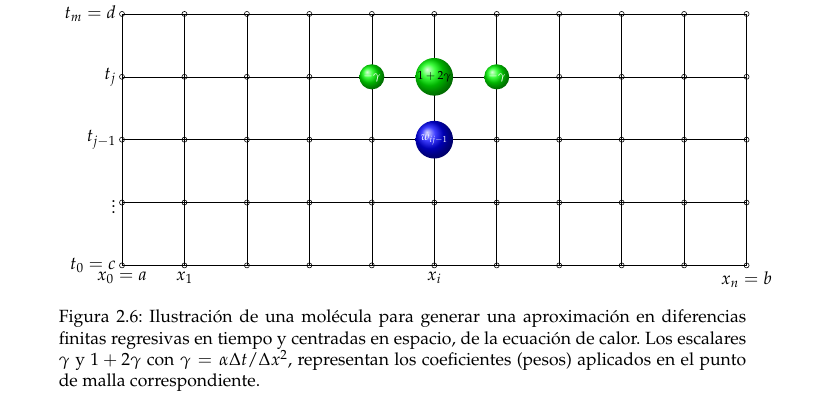

Vamos a extraer la matriz.
Usamos condiciones de Dirichlet.
La ecuacion (8) con $i=1$
$$-\gamma w_{0 j} + (1 + 2 \gamma) w_{1j} - \gamma w_{2j} = w_{1 j-1}  $$

* Extremo izquierdo
De forma que para $j=1$
$$(1 + 2 \gamma) w_{11} -\gamma w_{21} = w_{10} + \gamma w_{01} $$
Por las condiciones iniciales y de frontera
$$w_{i0}= u(x_i, t_0) = I_0(x) \quad , \quad w_{01}=h_1(t) \quad , \quad w_{n1}= h_t(t_1) $$

* Centro
En general


$$-\gamma w_{i-1 j} + (1 + 2 \gamma) w_{ij} - \gamma w_{i+1j} = w_{i j-1}  $$
$$w_{0j} = h_1(t_j) \quad , \quad w_{nj}=h_2(t_j) $$

El extremo derecho
Para $i=n-1$

$$-\gamma w_{n-2 j} + (1 + 2 \gamma) w_{n-1 j} - \gamma w_{nj} = w_{n-1 j-1}  $$

La podemos reorganizar

$$\gamma w_{n-2 j} + (1 + 2 \gamma) w_{n-1 j} = w_{n-1 j-1} + \gamma w_{nj} $$

El sistema matricial queda:

$$
\begin{pmatrix}
1 + 2 \gamma & - \gamma & 0 & \cdots & \cdots & 0 \\
-\gamma & 1 + 2 \gamma & -\gamma & \ddots &\ddots & \vdots \\
0 & \ddots & \ddots & \ddots & \ddots & \vdots \\
0 & \ddots & \ddots & -\gamma & 1 + 2 \gamma & -\gamma \\
0 & \cdots & \cdots & \cdots & - \gamma & 1 + 2 \gamma
\end{pmatrix}
\begin{pmatrix}
w_{1j} \\
w_{2j} \\
\vdots \\
w_{n-2 j} \\
w_{n-1 j}
\end{pmatrix}
=
\begin{pmatrix}
w_{1 j-1} \\
w_{2 j-1} \\
\vdots \\
w_{n-2 j-1} \\
w_{n-1 j-1} \\
\end{pmatrix}
+ \gamma
\begin{pmatrix}
w_{0j} \\ 0 \\ \vdots \\ 0  \\ w_{nj}
\end{pmatrix}
$$

Este sistema es incondicionalmente estable. La matriz es diagonalmente dominante, por filas.

Tenemos la recursion

$$A w_k = w_{k-1} + c $$

El algoritmo es:

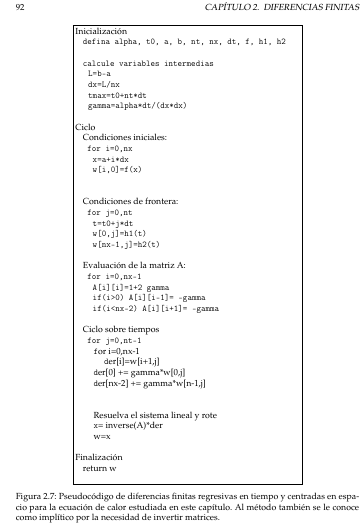

# Implementacion en `Python`
## Esquema BTCS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

def solu_eq_calor_implicit(alpha, t0, a, b, nt, nx, dt, f):
    L=b-a
    dx=L/(nx-1)
    gamma = alpha*dt/(dx**2)

    tmax=nt*dt
    t=np.arange(0, tmax, dt)
    w = np.zeros((nx,nt))
    X =np.linspace(a,b,w.shape[0])

    print("dimensiones de w", w.shape)
    print("dimensiones de X", X.shape)
    print("dimensiones de t", t.shape)


    # condiciones de bordo
    for i in range(nt):
        w[0,i] = 0
        w[nx-1,i] = 0

    # inicializacion del vector de la derecha
    rhs = np.zeros(nx-1)

    # inicializacion de matriz A
    A = np.zeros((nx-1,nx-1))

    # condicion inicial
    for i in range(nx):
        w[i,0] = f(X[i])

    # Lleno de la matriz A
    for i in range(0, nx-1):
        A[i,i] = 1 + 2*gamma
        if i < nx-2:
            A[i,i+1] = -gamma
        if i > 0:
            A[i,i-1] = -gamma

    print("gamma", gamma)

    # ciclo sobre tiempos
    for j in range(0, nt-1):
        # vector de la derecha
        for i in range(nx-1):
            rhs[i] = w[i+1, j]
        rhs[0] += gamma*w[0,j]
        rhs[nx-2] += gamma*w[nx-1,j]

        # resolvemos el sistema A w_j = w_{j-1}
        x = linalg.solve(A, rhs)

        # rotacion
        for i in range(nx-2):
            w[i+1, j+1] = x[i]

    return w


In [2]:
# prueba del algoritmo
alpha=1
a=0
b=1
nt=40001
nx=101
t0=0
x0=0
dt=0.00001
L=b-a

# definicion de la condicion inicial
def f(x):
    return 6*np.sin(np.pi*x/L)

w = solu_eq_calor_implicit(alpha, t0, a, b, nt, nx, dt, f)

dimensiones de w (101, 40001)
dimensiones de X (101,)
dimensiones de t (40001,)
gamma 0.1


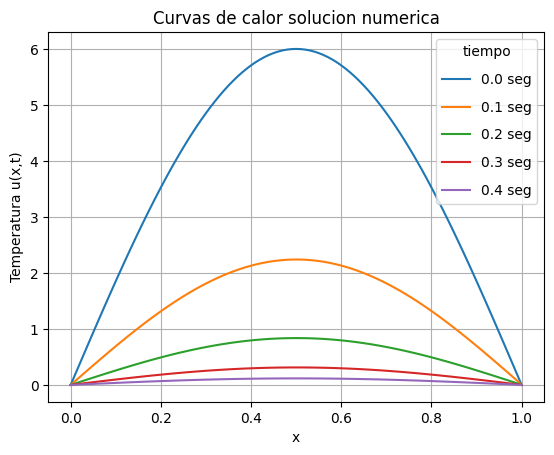

In [3]:
# graficamos
params = {'legend.fontsize': 'x-large', 'legend.handlength': 1}

# labels
plt.xlabel('x')
plt.ylabel('Temperatura u(x,t)')
plt.title("Curvas de calor solucion numerica")

# dominio
X = np.linspace(a,b, w.shape[0])
subsam=10000
for j in range(0, nt, subsam):
    t = j*dt
    plt.plot(X, w[:, j], label=str(round(t,1))+ ' seg')
    plt.legend(labelspacing=1, title='tiempo')

plt.grid()
plt.show()



# error con respecto a la solucion analitica

$$u(x,t) = 6 \sin \left (  \frac{\pi x}{L}  \right ) \mathrm{e}^{-(1/\alpha) \left ( \frac{\pi}{L}  \right )^2 t  }$$

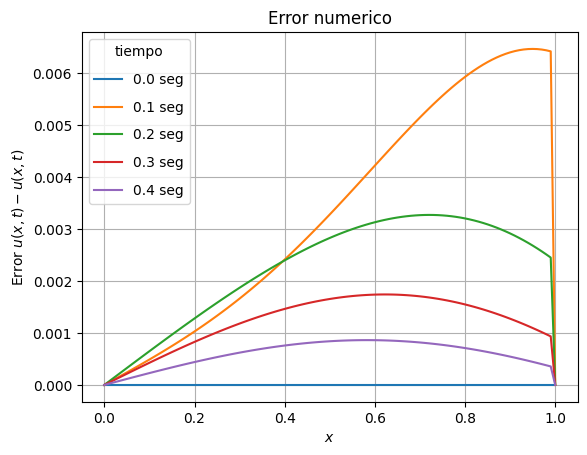

In [8]:
def u(x,t):
    return 6*np.sin(np.pi*x/L)*np.exp( - (1/alpha)*(np.pi/L)**2 * t)

nt=40001
dt = 0.00001
Nt=int(nt/10000) + 1

dx = (b-a)/(nx-1)

## inicializamos el error
error = np.zeros( (nx, Nt))
k=0
for j in range(0, nt, 10000):
    t = j*dt
    for i in range(nx):
        x=i*dx
        error[i,k] = w[i,j] - u(x,t)
    k +=1

# graficamos el error
params={'legend.fontsize':5, 'legend.handlength':1}

# labels
plt.xlabel(r'$x$')
plt.ylabel(r'Error $u(x,t)-u(x,t)$')
plt.title("Error numerico")

X = np.linspace(a,b,nx)
Dt=0.1
for j in range(0,Nt):
    t = j*Dt
    plt.plot(X, error[:,j], label=str(round(t,1))+ ' seg')
    plt.legend(labelspacing=1, title='tiempo')

plt.grid()
plt.show()


Aunque el metodo implicito es incondicionalmente estable esto no garantiza precision

dimensiones de w (101, 5)
dimensiones de X (101,)
dimensiones de t (5,)
gamma 1000.0


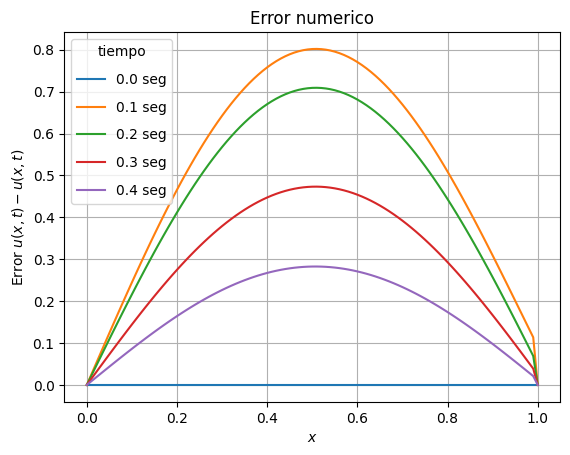

In [10]:
nt=5
dt=0.1
dx=(b-a)/(nx-1)
w = solu_eq_calor_implicit(alpha, t0, a, b, nt, nx, dt, f)

error = np.zeros( (nx, nt))
k=0
for j in range(nt):
    t = j*dt
    for i in range(nx):
        x=i*dx
        error[i,k]= w[i,j] - u(x,t)
    k +=1

# graficamos el error
params={'legend.fontsize':5, 'legend.handlength':1}

# labels
plt.xlabel(r'$x$')
plt.ylabel(r'Error $u(x,t)-u(x,t)$')
plt.title("Error numerico")

X = np.linspace(a,b,nx)
for j in range(Nt):
    t = j*dt
    plt.plot(X, error[:,j], label=str(round(t,1))+ ' seg')
    plt.legend(labelspacing=1, title='tiempo')

plt.grid()
plt.show()

# Metodo de Crank-Nicolson
Los metodos que hemos estudiado hasta este punto son del orden (error) $\mathcal{O}(\Delta t)$. John Crank y Phyllis Nicolson publicaron en 1947 un metodo que es preciso del orden $\mathcal{O}(\Delta t^2)$.

Voy a explicar lo que hicieron este par de personajes.

* Discretizacion FTCS

$$\frac{w_{i j+1} - w_{ij}}{\Delta t} = \alpha \frac{w_{i+1j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2}  + \mathcal{O}(\Delta x^2) - \frac{\partial^2 u}{\partial t^2} (c_1) \Delta t$$
donde $c_1 \in [t_j, t_{j+1}]$.
Hicimos explicito el error en teimpo de

$$\epsilon_{\text{ftcs}} = -\frac{\partial^2 u}{\partial t^2}(c_1) \Delta t $$

* Discretizacion BTCS. Asumiendo que estamos parados en tiempo en $t_{j+1}$

$$\frac{w_{i j+1}- w_{ij}}{\Delta t} = \alpha
\frac{w_{i+1 j+1} - w _{i j+1} + w_{i-1 j+1}}{\Delta x^2} + \mathcal{O}(\Delta x^2) + \frac{\partial^2 u}{\partial t^2}(c_2) \Delta t$$

Es decir, sin escribir los terminos de error

* FTCS
$$\frac{w_{i j+1} - w_{ij}}{\Delta t}= \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2} $$

* BTCS
$$\frac{w_{i j+1} - w_{ij+1}}{\Delta t}= \alpha \frac{w_{i+1 j+1} - 2 w_{ij+1} + w_{i-1 j+1}}{\Delta x^2} $$

Es interesante que estos dos esquemos se pueden escribir de forma unificacada como

$$\frac{w_{i j+1} - w_{ij}}{\Delta t}= S \left ( \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2} \right ) + (1- S)  \alpha \frac{w_{i+1 j+1} - 2 w_{ij+1} + w_{i-1 j+1}}{\Delta x^2}  $$



Crank-Nicolson eligieron $S=1/2$
Entonces

$$2 \frac{w_{i j+1} - w_{ij}}{\Delta t} =
\alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2} + \alpha \frac{w_{i+1 j+1} -2 w-{i j+1} + w_{i-1 j+1}}{\Delta x^2} + \mathcal{O}(\Delta x^2) + \frac{\partial^2 u}{\partial t^2}(c_2) \Delta t - \frac{\partial^2 u}{\partial t^2}(c_1) \Delta t $$

Se usa el teorema del valor medio TVM en el intervalo


$[t_i, t_i+\Delta t]$

$$\frac{\partial^2 u }{\partial t^2}(c_2) - \frac{\partial^2 u}{\partial t^2}(c_1)  = \frac{\partial^3 u}{\partial t^3}(c) \Delta t $$
con $c \in [c_1, c_2]$ si $c_1 < c_2$.

De forma que

$$2 \frac{w_{i j+1} - w_{ij}}{\Delta t} =
\alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2} + \alpha \frac{w_{i+1 j+1} -2 w-{i j+1} + w_{i-1 j+1}}{\Delta x^2} + \mathcal{O}(\Delta x^2) + \frac{\partial^3 u}{\partial t^3}(c) \Delta t^2 $$
